In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
data = pd.read_csv('iris.csv')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
y = data["target"]
X = data.iloc[:, :4]

In [13]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [15]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.11633479 -0.05977785  0.25491375  0.54759598]
Intercept: 0.25252758981814516


In [71]:
r2 = r2_score(y_test, y_pred)

print(f'R² score for test set: {r2}')

R² score for test set: 0.9468960016420045


In [73]:
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error for test set: {mae}')

Mean Absolute Error for test set: 0.14637694965308526


In [97]:
X_train_transformed = np.log(X_train)
X_test_transformed = np.log(X_test)

C:\Users\bstorm\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [87]:
model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

y_pred_transformed = model.predict(X_test)

In [89]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.06969951  0.17074503  1.04406425  0.16600367]
Intercept: -0.26324967105704333


In [93]:
r2 = r2_score(y_test, y_pred)

print(f'R² score for test set: {r2}')

R² score for test set: 0.8826699462194523


In [95]:
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error for test set: {mae}')

Mean Absolute Error for test set: 0.2510146596037653


In [173]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [175]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


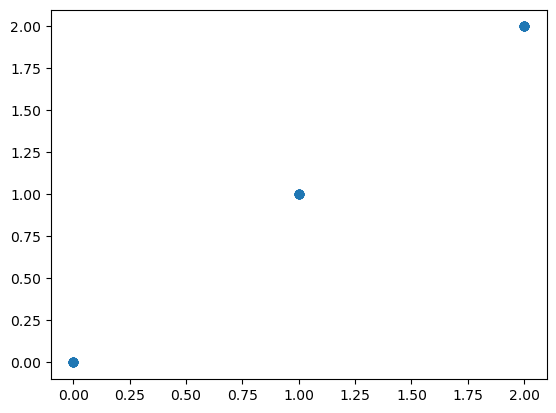

In [177]:
plt.scatter(y_pred,y_test)

In [165]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[48  0  0]
 [ 0 37  7]
 [ 0  0 43]]
